# <font color = lightcoral>Prepare Additional Data
>    
#### <font color = red> Source_Master_Appendix with event shortlist concatanted with template description

**20240715_flask_app_model_change_v1.00.py**

> FYI only --> Note the change in transformer model (for higher precision)
>

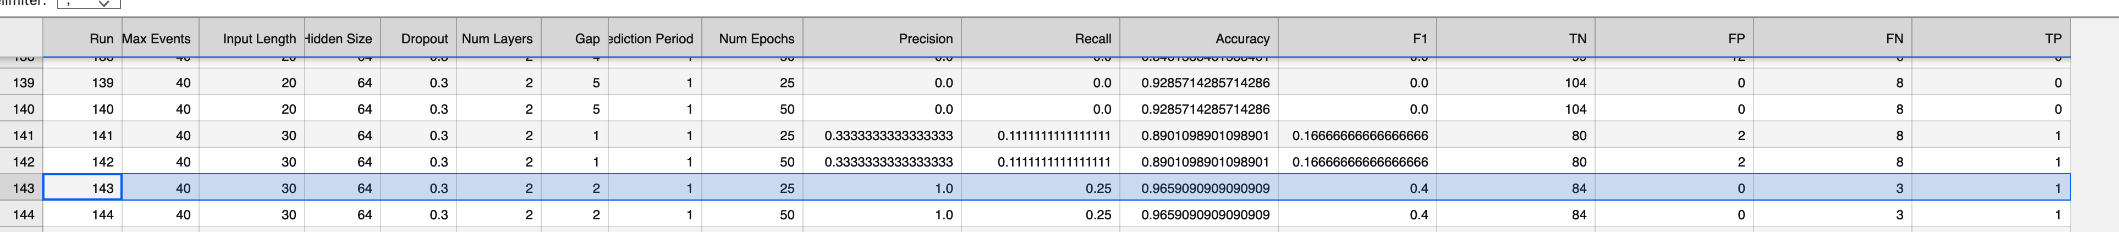

## <font color = grey> Admin

In [ ]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")

---

# <font color = lightsteelblue> 5 Key Files

In [ ]:
# import pandas as pd
# import numpy as np
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

# ################################## Part 1: Parsed Raw File ###################################

# print("\n" + "*"*100)
# print("********************** Part 1: Parsed Raw File ******************************************")
# print("*"*100 + "\n")

# parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# parsed_file_df = pd.read_csv(parsed_file)
# display(parsed_file_df.head())
# print("Shape of Parsed Raw File:", parsed_file_df.shape)

# ######################### Part 2: Encoded File with Feature for Model Training ######################

# print("\n" + "*"*100)
# print("********************** Part 2: Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :25].head())
# print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Encoded File where Train_Test = Test HEAD ###############################

# print("\n" + "*"*100)
# print("********************** Part 3: Test Set - HEAD *******************************")
# print("*"*100 + "\n")

# encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# ######################### Part 4: Encoded File where Train_Test = Test MIDDLE ###############################

# # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# print("\n" + "*"*100)
# print("********************** Part 4: Test Set - Records 100-200 *******************************")
# print("*"*100 + "\n")


# encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# display(encoded_feature_input_test_df.iloc[100:110, :25])
# print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# ######################### Part 5: Encoded File where Train_Test = Test TAIL ###############################

# print("\n" + "*"*100)
# print("********************** Part 5: Test Set - TAIL *******************************")
# print("*"*100 + "\n")

# encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# ######################### Part 6: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 6: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# eventid_template_df = pd.read_csv(eventid_template_file)
# display(eventid_template_df.head())
# print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# ######################### Part 7: Event_ID to Encoding Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 7: Event_ID to Encoding Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 8: First Two Records from X_test and y_test #######################

# print("\n" + "*"*100)
# print("********************** Part 8: First Two Records from X_test and y_test *****************************")
# print("*"*100 + "\n")

# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # Convert the first two records to DataFrames for better display
# X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # Display the first two records
# print("First two records from X_test:")
# display(X_test_first_two)

# print("\nFirst two records from y_test:")
# display(y_test_first_two)

# <font color = blue> Create new Source Appendix File with event ID level Detail for Agent Use Only
### <font color = blue> One Time Only

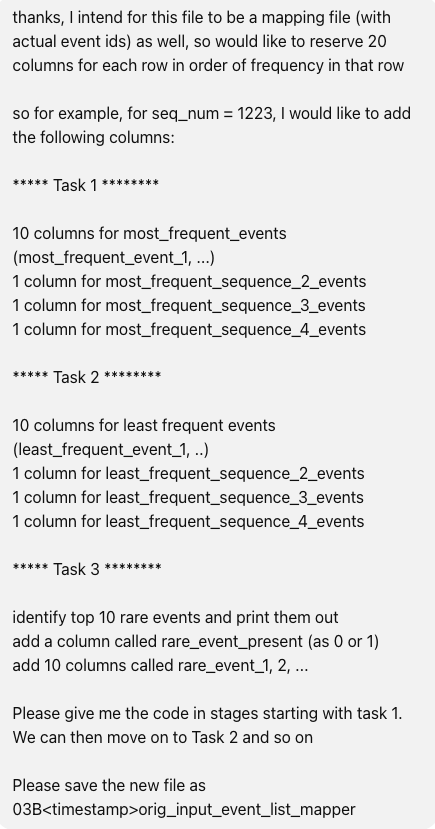

In [ ]:
# thanks, I intend for this file to be a mapping file (with actual event ids) as well, so would like to reserve 20 columns for each row in order of frequency in that row

# so for example, for seq_num = 1223, I would like to add the following columns:

# ***** Task 1 ********

# 10 columns for most_frequent_events (most_frequent_event_1, ...)
# 1 column for most_frequent_sequence_2_events
# 1 column for most_frequent_sequence_3_events
# 1 column for most_frequent_sequence_4_events

# ***** Task 2 ********

# 10 columns for least frequent events (least_frequent_event_1, ..)
# 1 column for least_frequent_sequence_2_events
# 1 column for least_frequent_sequence_3_events
# 1 column for least_frequent_sequence_4_events

# ***** Task 3 ********

# identify top 10 rare events and print them out
# add a column called rare_event_present (as 0 or 1)
# add 10 columns called rare_event_1, 2, ...

# Please give me the code in stages starting with task 1. We can then move on to Task 2 and so on

# Please save the new file as 03B<timestamp>orig_input_event_list_mapper

# Task 1: Adding Most Frequent Events and Sequences
## Part 1: Setup and Helper Functions --> DONE

**Process**
* Original Source File with all EventIDs - 35k: <font color = red>03.20240715_143154_orig_input_w_seq_info_FINAL.parquet

* Master Tracking File for Mapping (only selected EventIDs): <font color = red>03B.20240716_072206_orig_parquet_mapper_agents.parquet

In [ ]:
# import pandas as pd
# from collections import Counter
# import itertools
# from datetime import datetime

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)

# # Event ID columns
# event_id_columns = [col for col in encoded_feature_input_file_df.columns if col.startswith('EventId_')]

# # Function to get the most frequent events in a row
# def get_most_frequent_events(row, top_n=10):
#     event_counter = Counter(row[event_id_columns])
#     most_common_events = event_counter.most_common(top_n)
#     return [event for event, count in most_common_events]

# # Function to get the most frequent sequences in a row
# def get_most_frequent_sequence(row, n):
#     sequences = [tuple(row[event_id_columns][i:i+n]) for i in range(len(row[event_id_columns]) - n + 1)]
#     sequence_counter = Counter(sequences)
#     if sequence_counter:
#         return sequence_counter.most_common(1)[0][0]
#     else:
#         return tuple([None] * n)

## Part 2: Adding 10 Most Frequent Events Columns --> DONE

In [ ]:
# for i in range(1, 11):
#     column_name = f'most_frequent_event_{i}'
#     print(f"Processing {column_name}")
#     encoded_feature_input_file_df[column_name] = None  # Initialize column

#     for index, row in encoded_feature_input_file_df.iterrows():
#         most_frequent_events = get_most_frequent_events(row)
#         if i-1 < len(most_frequent_events):
#             encoded_feature_input_file_df.at[index, column_name] = most_frequent_events[i-1]
        
#         if (index + 1) % 100 == 0:
#             print(f"Processed {index + 1} rows for {column_name}")

#     # Save after processing each column
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
#     intermediate_file = f"{data_dir}/03B{timestamp}_step_most_frequent_events.parquet"
#     encoded_feature_input_file_df.to_parquet(intermediate_file, index=False)
#     print(f"Intermediate file saved: {intermediate_file}")

#### Display the created file

In [ ]:
# import pandas as pd

# # Load the latest file
# latest_file = f"{data_dir}/03B20240716070759_step_most_frequent_events.parquet"
# latest_df = pd.read_parquet(latest_file)

# # Display the head of the final dataframe
# display(latest_df.head())

### <font color = teal> Create Master Mapping File: <font color = tomato>03B.20240716_072206_orig_parquet_mapper_agents.parquet
#### Step to Drop EventId_ Columns and Save the DataFrame
##### <font color = red>Create Master Tracker File for appending in future runs

In [ ]:
# import pandas as pd
# from datetime import datetime

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# encoded_feature_input_file = f"{data_dir}/03B20240716070759_step_most_frequent_events.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)

# # Identify EventId columns
# event_id_columns = [col for col in encoded_feature_input_file_df.columns if col.startswith('EventId_')]

# # Drop all EventId_ columns
# encoded_feature_input_file_df.drop(columns=event_id_columns, inplace=True)

# # Save the modified DataFrame to a new parquet file
# timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
# output_file = f"{data_dir}/03B{timestamp}_orig_parquet_mapper_agents.parquet"
# encoded_feature_input_file_df.to_parquet(output_file, index=False)

# print(f"New parquet file saved to: {output_file}")

#### <font color = blue> Display the Master Mapping File <font color = tomato>03B.20240716_072206_orig_parquet_mapper_agents.parquet

In [ ]:
import pandas as pd

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# Load the latest file
latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
latest_df = pd.read_parquet(latest_file)

# Display the head of the final dataframe
display(latest_df.head())

---
# <font color = tomato> SKIP Parts 3 and below. The processing is too cumbersome and not completing. We will proceed with just the top 10 columns for most and least

___
## Part 3: Adding Most Frequent Sequence of 2 Events

In [ ]:
import pandas as pd
from collections import Counter
from datetime import datetime

# Directories
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
save_dir = '/home/ubuntu/04A.Local_Data_Files/20240716_Master_Mapper_Generation_Only'

# Files
original_source_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"

# Load the files
original_df = pd.read_parquet(original_source_file)
tracking_df = pd.read_parquet(master_tracking_file)

# Event ID columns
event_id_columns = [col for col in original_df.columns if col.startswith('EventId_')]

# Function to get the most frequent sequences in a row
def get_most_frequent_sequence(row, n):
    sequences = [tuple(row[event_id_columns][i:i+n]) for i in range(len(row[event_id_columns]) - n + 1)]
    sequence_counter = Counter(sequences)
    if sequence_counter:
        return sequence_counter.most_common(1)[0][0]
    else:
        return tuple([None] * n)

print("Processing most_frequent_sequence_2_events")
tracking_df['most_frequent_sequence_2_events'] = None  # Initialize column

for index, row in original_df.iterrows():
    most_frequent_sequence = get_most_frequent_sequence(row, 2)
    tracking_df.at[index, 'most_frequent_sequence_2_events'] = '-'.join(map(str, most_frequent_sequence))
    
    if (index + 1) % 100 == 0:
        print(f"Processed {index + 1} rows for most_frequent_sequence_2_events")
        
        # Periodic save
        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        intermediate_file = f"{save_dir}/03B{timestamp}_step_most_frequent_sequence_2.parquet"
        tracking_df.to_parquet(intermediate_file, index=False)
        print(f"Intermediate file saved: {intermediate_file}")

# Final save after processing the column
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
final_file = f"{data_dir}/03B{timestamp}_orig_parquet_mapper_agents.parquet"
tracking_df.to_parquet(final_file, index=False)
print(f"Final file saved: {final_file}")

## Part 4: Adding Most Frequent Sequence of 3 Events

In [ ]:
print("Processing most_frequent_sequence_3_events")
encoded_feature_input_file_df['most_frequent_sequence_3_events'] = None  # Initialize column

for index, row in encoded_feature_input_file_df.iterrows():
    encoded_feature_input_file_df.at[index, 'most_frequent_sequence_3_events'] = get_most_frequent_sequence(row, 3)
    
    if (index + 1) % 100 == 0:
        print(f"Processed {index + 1} rows for most_frequent_sequence_3_events")

# Save after processing the column
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
intermediate_file = f"{data_dir}/03B{timestamp}_step_most_frequent_sequence_3.parquet"
encoded_feature_input_file_df.to_parquet(intermediate_file, index=False)
print(f"Intermediate file saved: {intermediate_file}")


## Part 5: Adding Most Frequent Sequence of 4 Events

In [ ]:
print("Processing most_frequent_sequence_4_events")
encoded_feature_input_file_df['most_frequent_sequence_4_events'] = None  # Initialize column

for index, row in encoded_feature_input_file_df.iterrows():
    encoded_feature_input_file_df.at[index, 'most_frequent_sequence_4_events'] = get_most_frequent_sequence(row, 4)
    
    if (index + 1) % 100 == 0:
        print(f"Processed {index + 1} rows for most_frequent_sequence_4_events")

# Save after processing the column
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
intermediate_file = f"{data_dir}/03B{timestamp}_step_most_frequent_sequence_4.parquet"
encoded_feature_input_file_df.to_parquet(intermediate_file, index=False)
print(f"Intermediate file saved: {intermediate_file}")

## Part 6: Final Save

In [ ]:
# Save the final dataframe to a new parquet file
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
output_file = f"{data_dir}/03B{timestamp}_orig_input_event_list_mapper.parquet"
encoded_feature_input_file_df.to_parquet(output_file, index=False)

print(f"New parquet file saved to: {output_file}")